In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

In [105]:
gold = pd.read_csv('E:DATA SETS/Gold_data.csv',)
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [106]:
from bokeh.plotting import figure, show
p = figure(title="Price", x_axis_label='date', y_axis_label='price')
p.line(gold.date, gold.price, legend_label="Temp.", line_width=2)
show(p)

In [107]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [108]:
gold["price_squaroot"] =np.sqrt(gold["price"])
gold["t"] = np.arange(1,2183)

In [109]:
gold.isnull().sum()

date              0
price             0
price_squaroot    0
t                 0
dtype: int64

In [110]:
import statsmodels.formula.api as smf
model = smf.ols('price_squaroot~t',data =gold).fit()


In [111]:
model.params

Intercept    47.558717
t             0.008634
dtype: float64

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


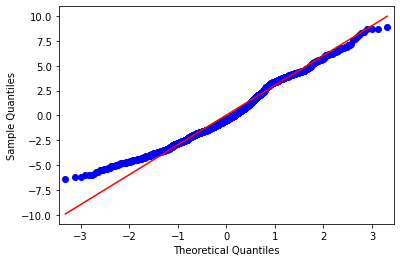

In [112]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.show()


In [113]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance


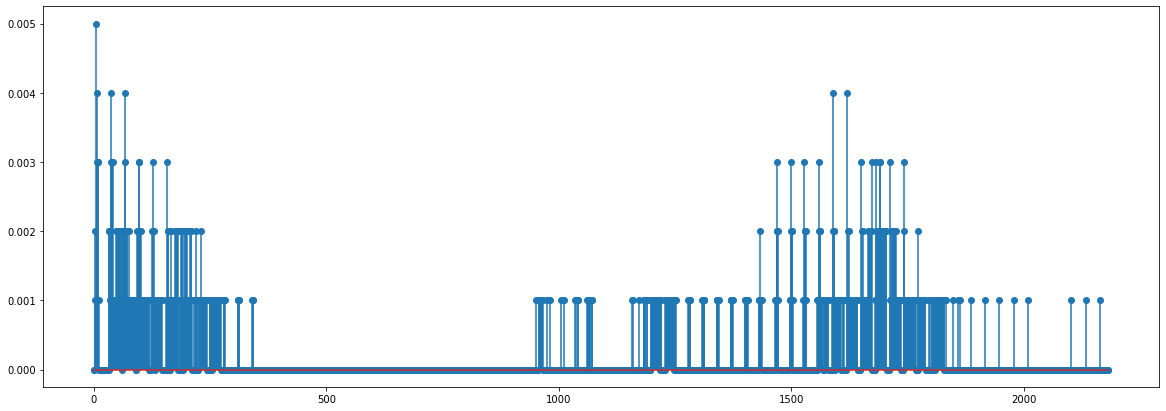

In [114]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(gold.t)),np.round(c,3))
plt.show()

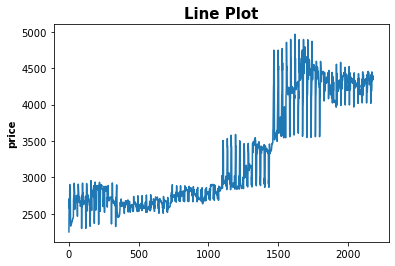

In [115]:
# Visualizing the overall data in order to the components present in our data
plt.title("Line Plot", size = 15, weight = 'bold')
plt.ylabel("price", size = 10, weight = 'bold')
plt.plot(gold['price'])

In [116]:
gold['date'] = pd.to_datetime(gold['date'])
gold['Year'] = pd.to_datetime(gold['date']).dt.year
gold["Month"] = gold.date.dt.strftime("%b") # month extraction

In [117]:
gold

,date,price,price_squaroot,t,Year,Month
0,2016-01-01,2252.60,47.461563,1,2016,Jan
1,2016-01-02,2454.50,49.542911,2,2016,Jan
2,2016-01-03,2708.10,52.039408,3,2016,Jan
3,2016-01-04,2577.80,50.772040,4,2016,Jan
4,2016-01-05,2597.75,50.968127,5,2016,Jan
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,66.290271,2178,2021,Dec
2178,2021-12-18,4389.50,66.253302,2179,2021,Dec
2179,2021-12-19,4389.50,66.253302,2180,2021,Dec
2180,2021-12-20,4354.10,65.985604,2181,2021,Dec


In [118]:
gold["t"] = np.arange(1,2183)
gold["t_squared"] = gold["t"]*gold["t"]
gold.columns
gold["log_price"] = np.log(gold["price"])
gold["price_squaroot"] =np.sqrt(gold["price"]) 

In [119]:
gold

,date,price,price_squaroot,t,Year,Month,t_squared,log_price
0,2016-01-01,2252.60,47.461563,1,2016,Jan,1,7.719840
1,2016-01-02,2454.50,49.542911,2,2016,Jan,4,7.805678
2,2016-01-03,2708.10,52.039408,3,2016,Jan,9,7.904003
3,2016-01-04,2577.80,50.772040,4,2016,Jan,16,7.854692
4,2016-01-05,2597.75,50.968127,5,2016,Jan,25,7.862401
...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,66.290271,2178,2021,Dec,4743684,8.388086
2178,2021-12-18,4389.50,66.253302,2179,2021,Dec,4748041,8.386971
2179,2021-12-19,4389.50,66.253302,2180,2021,Dec,4752400,8.386971
2180,2021-12-20,4354.10,65.985604,2181,2021,Dec,4756761,8.378873


<AxesSubplot:xlabel='Month', ylabel='Year'>

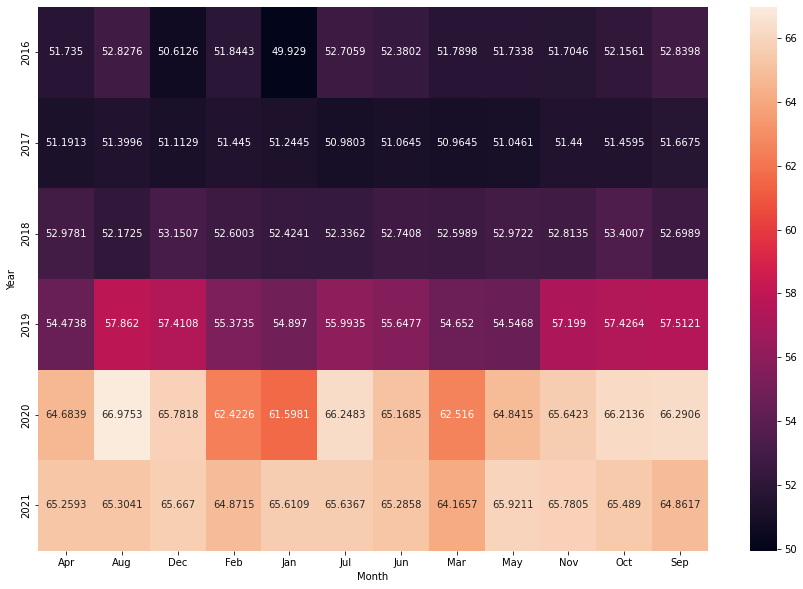

In [120]:
plt.figure(figsize=(15,10))
heatmap_y_month = pd.pivot_table(data=gold,values="price_squaroot",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='Year', ylabel='log_price'>

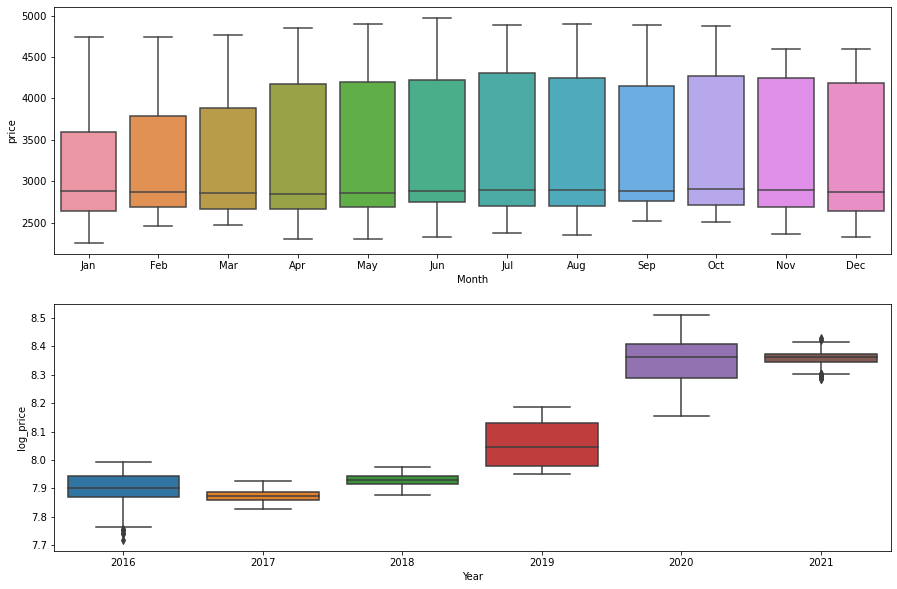

In [121]:
# Boxplot for ever
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x="Month",y="price",data=gold)
plt.subplot(212)
sns.boxplot(x="Year",y="log_price",data=gold)


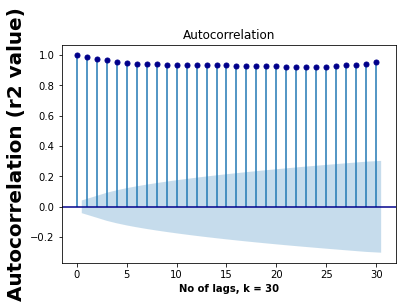

In [122]:
plot_acf(gold['price_squaroot'], lags = 30, color = 'darkblue')               # lags = 30 means it will plot for k = 30 lags 
plt.xlabel("No of lags, k = 30", size = 10, weight = 'bold')
plt.ylabel("Autocorrelation (r2 value)", size = 20, weight = 'bold')
plt.show()

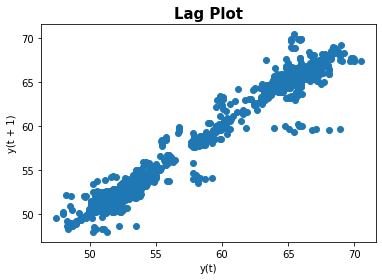

In [123]:
lag_plot(gold['price_squaroot'])
plt.title("Lag Plot", size = 15, weight = "bold")
plt.show()

<AxesSubplot:xlabel='date', ylabel='price'>

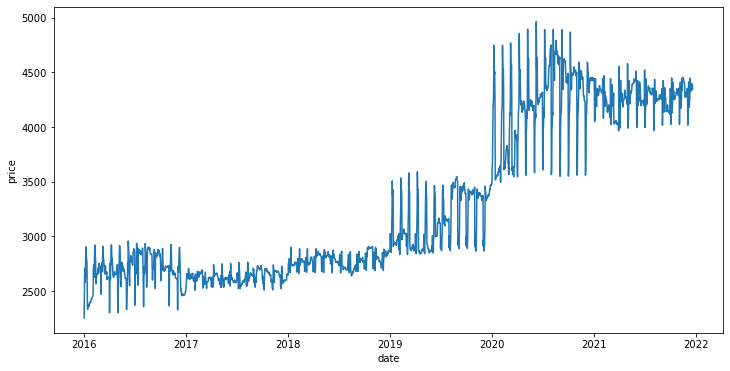

In [124]:
plt.figure(figsize=(12,6))
sns.lineplot(x="date",y="price",data=gold)

<AxesSubplot:xlabel='Month', ylabel='price'>

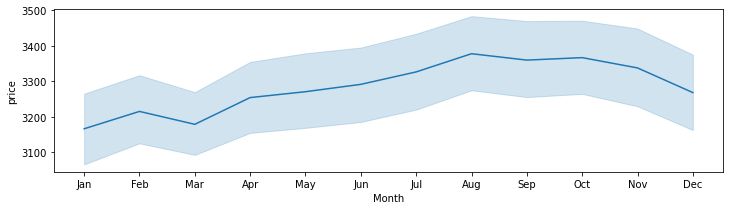

In [125]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="price",data=gold)

<AxesSubplot:xlabel='Year', ylabel='price'>

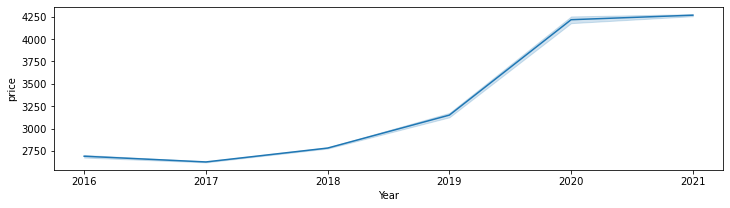

In [126]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="price",data=gold)

In [127]:
gold.shape

(2182, 8)

In [128]:
gold.tail(5)

,date,price,price_squaroot,t,Year,Month,t_squared,log_price
2177,2021-12-17,4394.4,66.290271,2178,2021,Dec,4743684,8.388086
2178,2021-12-18,4389.5,66.253302,2179,2021,Dec,4748041,8.386971
2179,2021-12-19,4389.5,66.253302,2180,2021,Dec,4752400,8.386971
2180,2021-12-20,4354.1,65.985604,2181,2021,Dec,4756761,8.378873
2181,2021-12-21,4346.5,65.927991,2182,2021,Dec,4761124,8.377126


In [129]:
train = gold.head(1500)
test = gold.head(865)

In [130]:
#linear model

linear = smf.ols('price~t',data=train).fit()
pred_linear =  pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_linear))**2))
rmse_linear

158.99948953169323

In [131]:
#quadratic model

Quad = smf.ols('price~t+t_squared',data=train).fit() #quadratic model
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  116.3865892239114


In [132]:
#exponential model

Exp = smf.ols('log_price~t',data=train).fit() #exponential model
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['price'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  150.0782222208654


In [133]:
#additive seasonality

add_sea = smf.ols('price~date',data=train).fit() #additive seasonality model
pred_add_sea = pd.Series(add_sea.predict(test[['date']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)

Root Mean Square Error :  1.2543715921021596e-10


In [134]:
#additive seasonality with linear treand

add_sea_quad = smf.ols('price~t+t_squared+date',data=train).fit() #additive seasonality qudratic model
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','date']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  2.307121562756609e-07


In [135]:
#additive seasonality with quadratic trend

add_sea_quad = smf.ols('price~t+t_squared+date',data=train).fit() #additive seasonality qudratic model
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','date']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  2.307121562756609e-07


In [136]:
#multiplicative seasonality

Mul_sea = smf.ols('log_price~t+t_squared+date',data = train).fit() #multiplicative seasonality model
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  2.007573077586114e-06


In [137]:
#multiplicative additive seasonality

Mul_Add_sea = smf.ols('log_price~t+date',data = train).fit() #multiplicative additive seasonality
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea) 

Root Mean Square Error :  1.1484349963634198e-09


In [138]:

#tabuling rmes value
Final_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
Final_result = pd.DataFrame(Final_data) #data frame of final result
Final_result.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_add_sea,1.254372e-10
6,rmse_Mult_add_sea,1.148435e-09
4,rmse_add_sea_quad,2.307122e-07
5,rmse_Mult_sea,2.007573e-06
2,rmse_Quad,1.163866e+02
1,rmse_Exp,1.500782e+02
0,rmse_linear,1.589995e+02


In [139]:
gold1=pd.read_csv('Gold_data.csv',header=0, index_col=0, parse_dates=True)
gold1


,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [140]:
Final_pred = smf.ols('log_price~t+date',data = train).fit()


<AxesSubplot:ylabel='Density'>

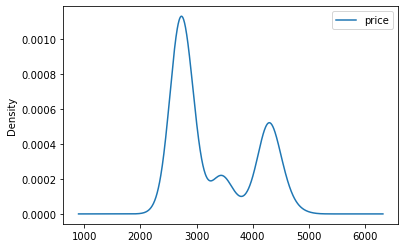

In [141]:
gold1.plot(kind='kde')

# ARIMA Model

In [142]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [143]:
%matplotlib inline   

In [144]:
#path = "input/Airprice.csv" #For local

dataset = pd.read_csv('E:DATA SETS/Gold_data.csv')
#Parse strings to datetime type
dataset['date'] = pd.to_datetime(dataset['date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['date'])
indexedDataset.head(15)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
2016-01-06,2617.70
2016-01-07,2903.80
2016-01-08,2887.80
2016-01-09,2813.80


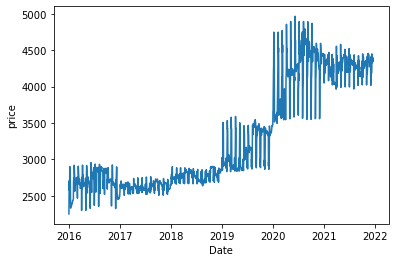

In [145]:
## plot graph
plt.xlabel('Date')
plt.ylabel('price')
plt.plot(indexedDataset)

In [146]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=30).mean() #window size 12 denotes 12 dates, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=30).std()
print(rolmean,rolstd)

                  price
date                   
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04          NaN
2016-01-05          NaN
...                 ...
2021-12-17  4313.400000
2021-12-18  4312.273333
2021-12-19  4311.586667
2021-12-20  4309.916667
2021-12-21  4307.993333

[2182 rows x 1 columns]                 price
date                 
2016-01-01        NaN
2016-01-02        NaN
2016-01-03        NaN
2016-01-04        NaN
2016-01-05        NaN
...               ...
2021-12-17  89.758780
2021-12-18  88.535525
2021-12-19  87.827691
2021-12-20  86.471818
2021-12-21  84.930377

[2182 rows x 1 columns]


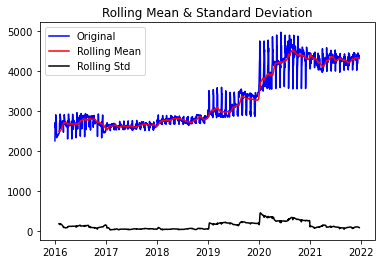

In [147]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [148]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['price'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -0.309904
p-value                           0.924090
#Lags Used                       26.000000
Number of Observations Used    2155.000000
Critical Value (1%)              -3.433388
Critical Value (5%)              -2.862882
Critical Value (10%)             -2.567484
dtype: float64


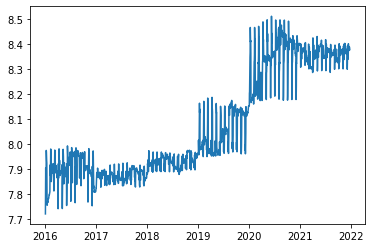

In [149]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

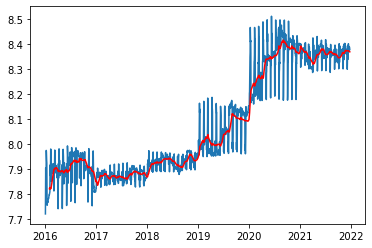

In [150]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=30).mean()
movingSTD = indexedDataset_logScale.rolling(window=30).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [151]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,price
date,
2016-01-30,-0.021782
2016-01-31,-0.021387
2016-02-01,-0.018246
2016-02-02,-0.011940
2016-02-03,0.077561
2016-02-04,0.084566
2016-02-05,0.091472
2016-02-06,0.051595
2016-02-07,0.107647


In [152]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

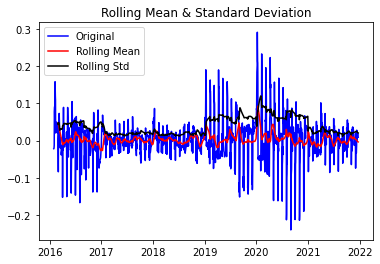

Results of Dickey Fuller Test:
Test Statistic                -9.489456e+00
p-value                        3.686187e-16
#Lags Used                     2.600000e+01
Number of Observations Used    2.126000e+03
Critical Value (1%)           -3.433430e+00
Critical Value (5%)           -2.862900e+00
Critical Value (10%)          -2.567494e+00
dtype: float64


In [153]:
test_stationarity(datasetLogScaleMinusMovingAverage)

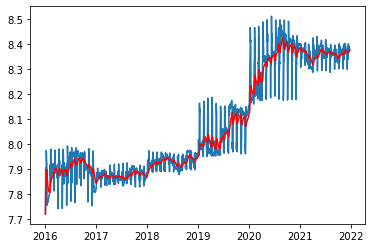

In [154]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

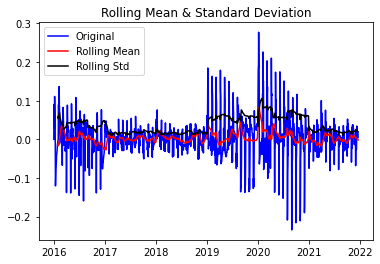

Results of Dickey Fuller Test:
Test Statistic                -8.814977e+00
p-value                        1.945338e-14
#Lags Used                     2.600000e+01
Number of Observations Used    2.155000e+03
Critical Value (1%)           -3.433388e+00
Critical Value (5%)           -2.862882e+00
Critical Value (10%)          -2.567484e+00
dtype: float64


In [155]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

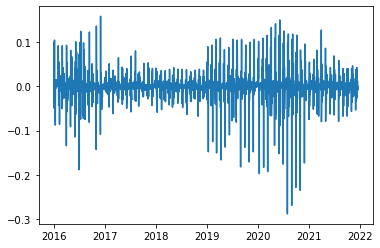

In [156]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

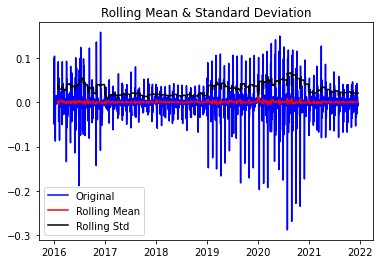

Results of Dickey Fuller Test:
Test Statistic                  -21.394232
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2154.000000
Critical Value (1%)              -3.433390
Critical Value (5%)              -2.862883
Critical Value (10%)             -2.567485
dtype: float64


In [157]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

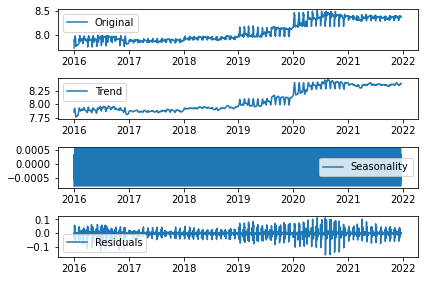

In [158]:
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.


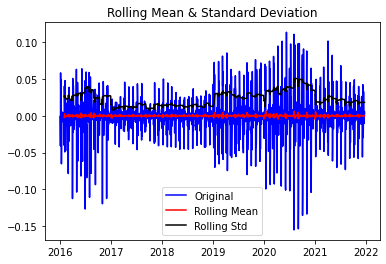

Results of Dickey Fuller Test:
Test Statistic                -1.805832e+01
p-value                        2.626423e-30
#Lags Used                     2.600000e+01
Number of Observations Used    2.149000e+03
Critical Value (1%)           -3.433397e+00
Critical Value (5%)           -2.862886e+00
Critical Value (10%)          -2.567486e+00
dtype: float64


In [159]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
 #Determine rolling statistics
movingAverage = decomposedLogData.rolling(window=30).mean()
movingSTD = decomposedLogData.rolling(window=30).std()
    
    #Plot rolling statistics
orig = plt.plot(decomposedLogData, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
   
    #Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(decomposedLogData, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [160]:
decomposedLogData

date
2016-01-04   -0.001017
2016-01-05   -0.029126
2016-01-06   -0.040955
2016-01-07    0.058340
2016-01-08    0.044413
                ...   
2021-12-14   -0.010317
2021-12-15   -0.003635
2021-12-16    0.005876
2021-12-17    0.005903
2021-12-18    0.003048
Name: resid, Length: 2176, dtype: float64

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


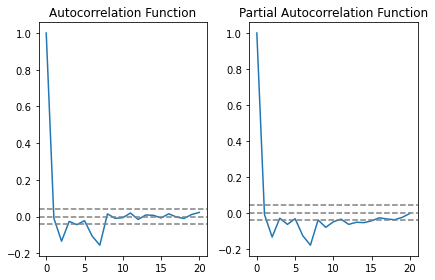

In [161]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()     

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D w

Plotting AR model


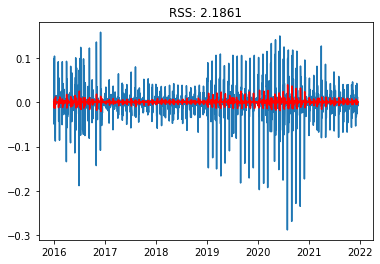

In [162]:
#AR Model
#making order=(1,1,0) gives RSS=1.5023
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['price'])**2))
print('Plotting AR model')

Plotting MA model


C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


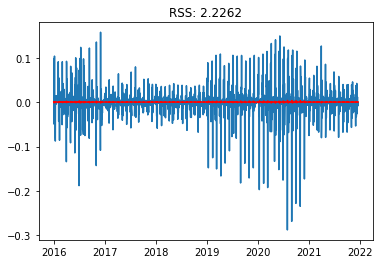

In [163]:
#MA Model
model = ARIMA(indexedDataset_logScale, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['price'])**2))
print('Plotting MA model')

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Plotting ARIMA model


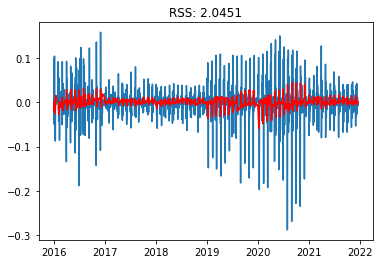

In [164]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDataset_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['price'])**2))
print('Plotting ARIMA model')

In [165]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2016-01-02    0.000250
2016-01-03   -0.008829
2016-01-04   -0.019323
2016-01-05   -0.011368
2016-01-06   -0.011368
dtype: float64


In [166]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

date
2016-01-02    0.000250
2016-01-03   -0.008579
2016-01-04   -0.027902
2016-01-05   -0.039269
2016-01-06   -0.050638
                ...   
2021-12-17    0.392125
2021-12-18    0.390021
2021-12-19    0.388240
2021-12-20    0.386565
2021-12-21    0.386504
Length: 2181, dtype: float64


In [167]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['price'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2016-01-01    7.719840
2016-01-02    7.720090
2016-01-03    7.711261
2016-01-04    7.691939
2016-01-05    7.680571
dtype: float64

No handles with labels found to put in legend.


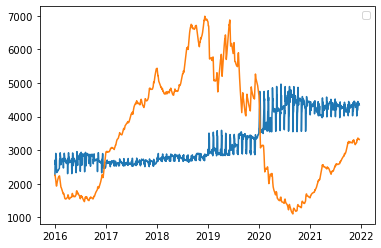

In [171]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.legend()

In [169]:
indexedDataset_logScale

,price
date,
2016-01-01,7.719840
2016-01-02,7.805678
2016-01-03,7.904003
2016-01-04,7.854692
2016-01-05,7.862401
...,...
2021-12-17,8.388086
2021-12-18,8.386971
2021-12-19,8.386971


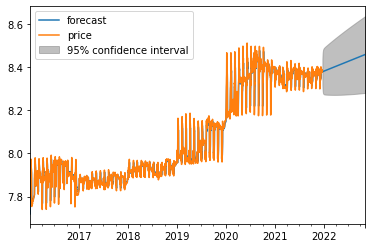

In [170]:
#We have 144(existing data of 12 yrs in dates) data points. 
#And we want to forecast for additional 120 data points or 10 yrs.
results_ARIMA.plot_predict(1,2500) 
x=results_ARIMA.forecast(steps=30)

In [187]:
r=sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['price'])**2)

In [200]:
(1/2182)*r

0.0009372430422836421

In [1]:
from sklearn.metrics import mean_squared_error as mse
import math
rmse = math.sqrt(mse(indexedDataset_logScale,results_ARIMA.fittedvalues))
rmse

NameError: name 'indexedDataset_logScale' is not defined

In [194]:
r5=sum((results_AR.fittedvalues - datasetLogDiffShifting['price'])/results_AR.fittedvalues)

In [195]:
r5

27050.784632433526

In [216]:
w = indexedDataset.values
w

array([[2252.6],
       [2454.5],
       [2708.1],
       ...,
       [4389.5],
       [4354.1],
       [4346.5]])

In [218]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                 2181
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4509.329
Method:                       css-mle   S.D. of innovations              0.031
Date:                Mon, 25 Apr 2022   AIC                          -9010.658
Time:                        17:26:39   BIC                          -8987.908
Sample:                    01-02-2016   HQIC                         -9002.341
                         - 12-21-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002    8.9e-05      2.805      0.005    7.52e-05       0.000
ar.L1.D.price     0.7843      0.015     51.030      0.000       0.754       0.814
ma.L1.D.price    -0.9711      0.005   -203.444      0.000      -0.980      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2750           +0.0000j            1.2750            0.0000
MA.1            1.0297           +0.0000j            1.0297            0.0000
-----------------------------------------------------------------------------
"""

In [219]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax})

In [220]:
forecast_accuracy(datasetLogDiffShifting['price'],results_ARIMA.fittedvalues)

C:\Users\Win-10\AppData\Local\Temp/ipykernel_9732/2177364070.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\Win-10\AppData\Local\Temp/ipykernel_9732/2177364070.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\Win-10\AppData\Local\Temp/ipykernel_9732/2177364070.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
C:\Users\Win-10\AppData\Local\Temp/ipykernel_9732/2177364070.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `ob

{'mape': 12.374446034915518,
 'me': 0.00012415497375280567,
 'mae': 0.01672048833401447,
 'mpe': 1.1045903003854955,
 'rmse': 0.030621443028708402,
 'corr': 0.2854801019017128,
 'minmax': inf}